<a href="https://colab.research.google.com/github/KasiR07/Heart-Disease-Prediction-System/blob/main/Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Dependencies



In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [ ]:
heart_dataset = pd.read_csv('/content/sample_data/heart.csv')

In [ ]:
heart_dataset.shape


(303, 14)

In [ ]:
heart_dataset.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
heart_dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
heart_dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


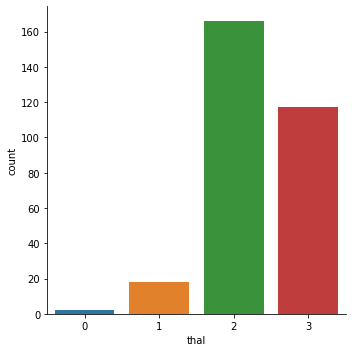

In [ ]:
sns.catplot(x='thal', data = heart_dataset, kind = 'count')


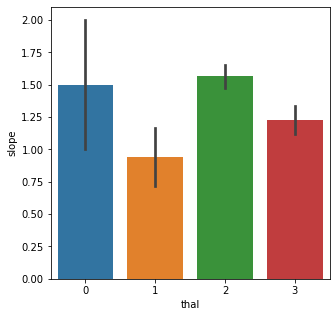

In [ ]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='thal' , y='slope', data = heart_dataset)

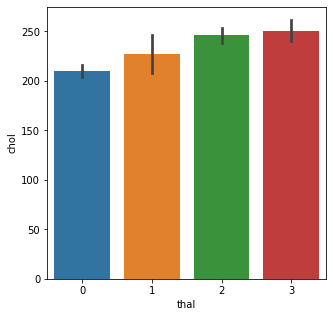

In [ ]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='thal' , y='chol', data = heart_dataset)

In [ ]:
correlation = heart_dataset.corr()

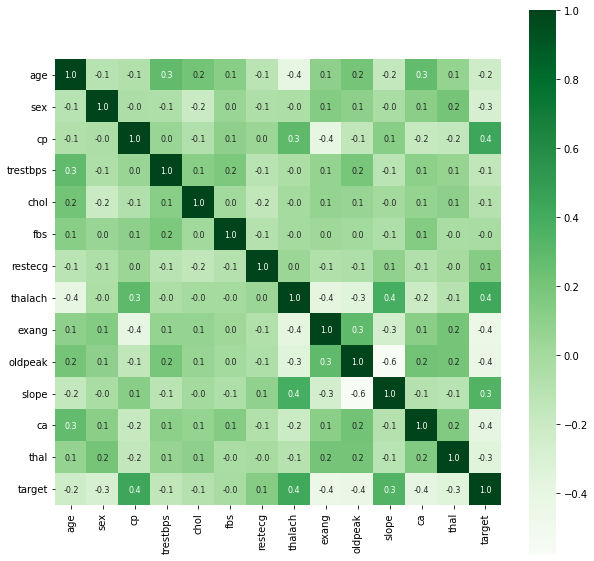

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':8}, cmap= 'Greens')

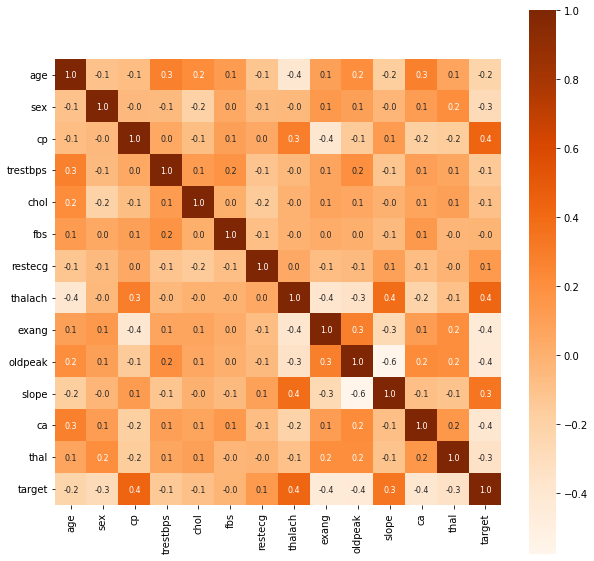

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':8}, cmap= 'Oranges')

In [ ]:
X = heart_dataset.drop('thal',axis=1)

In [ ]:
print(X)

     age  sex  cp  trestbps  chol  ...  exang  oldpeak  slope  ca  target
0     63    1   3       145   233  ...      0      2.3      0   0       1
1     37    1   2       130   250  ...      0      3.5      0   0       1
2     41    0   1       130   204  ...      0      1.4      2   0       1
3     56    1   1       120   236  ...      0      0.8      2   0       1
4     57    0   0       120   354  ...      1      0.6      2   0       1
..   ...  ...  ..       ...   ...  ...    ...      ...    ...  ..     ...
298   57    0   0       140   241  ...      1      0.2      1   0       0
299   45    1   3       110   264  ...      0      1.2      1   0       0
300   68    1   0       144   193  ...      0      3.4      1   2       0
301   57    1   0       130   131  ...      1      1.2      1   1       0
302   57    0   1       130   236  ...      0      0.0      1   1       0

[303 rows x 13 columns]


In [ ]:
Y = heart_dataset['thal'].apply(lambda y_value: 1 if y_value>=2 else 0)

In [ ]:
print(Y)

0      0
1      1
2      1
3      1
4      1
      ..
298    1
299    1
300    1
301    1
302    1
Name: thal, Length: 303, dtype: int64


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(Y.shape, Y_train.shape, Y_test.shape)

(303,) (242,) (61,)


In [ ]:
model = RandomForestClassifier()

In [ ]:
model.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)